In [2]:
#Machine Learning Project- H&M dataset EDA
import os
print("my path is ", os.getcwd())

files = [f for f in os.listdir('.') if os.path.isfile(f)]
print(files)

my path is  /Users/seema/Documents/Untitled Folder
['.DS_Store', 'Untitled.ipynb', 'articles.csv']


In [3]:
# Imports

import pandas as pd
import numpy as np
import networkx as nx
import os

os.sys.path
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import cv2

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
articles = pd.read_csv("articles.csv")
customers = pd.read_csv("/Users/seema/Downloads/h-and-m-personalized-fashion-recommendations/customers.csv")
transactions = pd.read_csv("/Users/seema/Downloads/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

In [5]:
# Helper plot functions

def plot_value_counts(data,column,p,labels):
    
    age_counts = data[column].value_counts()[p[0]:p[1]]

    fig = px.bar(age_counts,color = age_counts)
    fig.update_layout(
        xaxis_title = labels[0],
        yaxis_title = labels[1],
        title_x = 0.5, 
        showlegend = False,
        
    )
    fig.update_xaxes(tickangle=90)
    fig.show()
    
    
    
    
def plot_wordcloud(data,column):
    
    text = ' '.join(list(data[column]))
    wordcloud = WordCloud().generate(text)
    return wordcloud

In [6]:
articles.head()


article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid                 10             White  ...   
2                    Stripe                 11         Off White  ...   
3                     Solid                  9             Black  ...   
4                     Solid                 10             White  ...   

   department_name index_code        index_name index_group_no  \
0     Jersey Basic          A        Ladieswear              1   
1     Jersey Basic          A        Ladieswear              1   
2     Jersey Basic          A        Ladieswear              1   
3   Clean Lingerie          B  Lingeries/Tights              1   
4   Clean Lingerie          B  Lingeries/Tights              1   

   index_group_name section_no            section_name garment_group_no  \
0        Ladieswear         16  Womens Everyday Basics             1002   
1        Ladieswear         16  Womens Everyday Basics             1002   
2        Ladieswear         16  Womens Everyday Basics             1002   
3        Ladieswear         61         Womens Lingerie             1017   
4        Ladieswear         61         Womens Lingerie             1017   

   garment_group_name                                        detail_desc  
0        Jersey Basic            Jersey top with narrow shoulder straps.  
1        Jersey Basic            Jersey top with narrow shoulder straps.  
2        Jersey Basic            Jersey top with narrow shoulder straps.  
3   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  

[5 rows x 25 columns]

In [7]:
# Different product attributes

print(articles.columns)

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')


In [8]:
# Check no of products and description in articles

print(f'\033[94mNo of products: ',articles.shape[0])
print(f'\033[94mNo of product attributes: ',articles.shape[1])
print("")
print(f'\033[92mNo of different product types: ',len(articles['product_type_name'].unique()))
print(f'\033[92mNo of different product groups: ',len(articles['product_group_name'].unique()))
print(f'\033[92mNo of different color groups: ',len(articles['colour_group_name'].unique()))
print(f'\033[92mNo of different sections in H&M: ',len(articles['section_name'].unique()))
print(f'\033[92mNo of different departments in H&M: ',len(articles['department_name'].unique()))

No of products:  105542
No of product attributes:  25

No of different product types:  131
No of different product groups:  19
No of different color groups:  50
No of different sections in H&M:  56
No of different departments in H&M:  250


In [9]:
plot_value_counts(articles,'product_type_name',[0,15],["No of items","Product types"])

In [10]:
# text = [x for x in list(articles['detail_desc'])]
# text = [str(x) for x in text]
# text = ' '.join(text)

# wordcloud = WordCloud().generate(text)
    
# # Generate plot
                
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()

In [11]:
plot_value_counts(articles,'product_type_name',[0,15],["No of items","Product types"])

In [12]:
plot_value_counts(articles,'colour_group_name',[0,15],["No of items","Product groups"])

In [13]:
plot_value_counts(articles,'section_name',[0,15],["No of items","Section groups"])

In [14]:
plot_value_counts(articles,'department_name',[0,15],["No of items","Department groups"])

In [22]:
customers.head()

customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

In [23]:
print(f'\033[94mNo of customers: ',customers.shape[0])
print(f'\033[94mNo of customer attributes: ',customers.shape[1])
print("")
print(f'\033[92mDifferent regions of shoppers: ',len(customers['postal_code'].unique()))

No of customers:  1371980
No of customer attributes:  7

Different regions of shoppers:  352899


In [24]:
age_counts = customers["age"].value_counts()

fig = px.bar(age_counts, title="Age of customers")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

In [25]:
print(f'\033[92mMean age of customers: ',customers['age'].mean())
print(f'\033[92mMedian age of customers: ',customers['age'].median())

Mean age of customers:  36.386964565794
Median age of customers:  32.0


In [26]:
plot_value_counts(customers,'club_member_status',[0,15],["No of customers","club_member_status"])

In [27]:
plot_value_counts(customers,'fashion_news_frequency',[0,15],["No of customers",'fashion_news_frequency'])

In [28]:
customer = customers.dropna()

for val in customer['club_member_status'].unique():
    
    data = customer[customer['club_member_status']==val]
    age_counts = data["age"].value_counts()

    fig = px.bar(age_counts, title="Age of customers with "+str(val)+" club member status")
    fig.update_layout(
        xaxis_title = "Age",
        yaxis_title = "Frequency",
        title_x = 0.5, 
        showlegend = False
    )
    fig.show()

In [29]:
customer = customers.dropna()
customer['fashion_news_frequency'][1356686] = "NONE"

for val in customer['fashion_news_frequency'].unique():
    
    data = customer[customer['fashion_news_frequency']==val]
    age_counts = data["age"].value_counts()

    fig = px.bar(age_counts, title="Age of customers who read fashion news "+str(val)+" ")
    fig.update_layout(
        xaxis_title = "Age",
        yaxis_title = "Frequency",
        title_x = 0.5, 
        showlegend = False
    )
    fig.show()

In [30]:
from scipy.stats import chi2_contingency


CrosstabResult=pd.crosstab(index=customer['club_member_status'],columns=customer['fashion_news_frequency'])
ChiSqResult = chi2_contingency(CrosstabResult)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 3.673680299373323e-53


In [31]:
transactions.head()

t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237                 2  
3  0.016932                 2  
4  0.016932                 2

In [32]:
# Check no of products and description in articles

print(f'\033[94mNo of transactions: ',transactions.shape[0])
print(f'\033[94mNo of transaction attributes: ',transactions.shape[1])
print("")
print(f'\033[92mTransaction days: ',len(transactions['t_dat'].unique()))
print(f'\033[92mNo of different customers: ',len(transactions['customer_id'].unique()))
print(f'\033[92mNo of different articles sold: ',len(transactions['article_id'].unique()))

No of transactions:  31788324
No of transaction attributes:  5

Transaction days:  734
No of different customers:  1362281
No of different articles sold:  104547


In [33]:
transactions_date_group = transactions.groupby('t_dat').agg({
    'price':'sum'
})

In [34]:
popular_items = transactions['article_id'].value_counts()[0:15]

print(popular_items.index.tolist())

[706016001, 706016002, 372860001, 610776002, 759871002, 464297007, 372860002, 610776001, 399223001, 706016003, 720125001, 156231001, 562245046, 562245001, 351484002]


In [35]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=transactions_date_group.index,
                         y=transactions_date_group['price'].round(0),
                         mode='lines',
                         name='Daily Sales'))


fig.update_yaxes(hoverformat="$d")

fig.show()

In [36]:
print(f'\033[98mThe Top - 15 Products sold')
print('='*60)
for i in popular_items.index.tolist():
    
    prod_name = articles[articles['article_id']==i]['prod_name'].to_string()
    prod_type = articles[articles['article_id']==i]['product_type_name'].to_string()
    
    print(f'\033[93m',' '.join(prod_name.split(' ')[4:]),': ',' '.join(prod_type.split(' ')[4:]))
    

The Top - 15 Products sold
 Jade HW Skinny Denim TRS :  Trousers
 Jade HW Skinny Denim TRS :  Trousers
 7p Basic Shaftless :  Socks
 Tilly (1) :  T-shirt
 Tilda tank :  Vest top
 Greta Thong Mynta Low 3p :  Underwear bottom
 7p Basic Shaftless :  Socks
 Tilly (1) :  T-shirt
 Curvy Jeggings HW Ankle :  Trousers
 Jade HW Skinny Denim TRS :  Trousers
 SUPREME RW tights :  Leggings/Tights
 Box 4p Tights :  Underwear Tights
 Luna skinny RW :  Trousers
 Luna skinny RW :  Trousers
 Lazer Razer Brief :  Swimwear bottom


In [37]:
connected = pd.merge(left=articles, right=transactions, left_on='article_id', right_on='article_id')

In [38]:
connected.head()

article_id  product_code  prod_name  product_type_no product_type_name  \
0   108775015        108775  Strap top              253          Vest top   
1   108775015        108775  Strap top              253          Vest top   
2   108775015        108775  Strap top              253          Vest top   
3   108775015        108775  Strap top              253          Vest top   
4   108775015        108775  Strap top              253          Vest top   

   product_group_name  graphical_appearance_no graphical_appearance_name  \
0  Garment Upper body                  1010016                     Solid   
1  Garment Upper body                  1010016                     Solid   
2  Garment Upper body                  1010016                     Solid   
3  Garment Upper body                  1010016                     Solid   
4  Garment Upper body                  1010016                     Solid   

   colour_group_code colour_group_name  ...  index_group_name section_no  \
0                  9             Black  ...        Ladieswear         16   
1                  9             Black  ...        Ladieswear         16   
2                  9             Black  ...        Ladieswear         16   
3                  9             Black  ...        Ladieswear         16   
4                  9             Black  ...        Ladieswear         16   

             section_name garment_group_no  garment_group_name  \
0  Womens Everyday Basics             1002        Jersey Basic   
1  Womens Everyday Basics             1002        Jersey Basic   
2  Womens Everyday Basics             1002        Jersey Basic   
3  Womens Everyday Basics             1002        Jersey Basic   
4  Womens Everyday Basics             1002        Jersey Basic   

                               detail_desc       t_dat  \
0  Jersey top with narrow shoulder straps.  2018-09-20   
1  Jersey top with narrow shoulder straps.  2018-09-20   
2  Jersey top with narrow shoulder straps.  2018-09-20   
3  Jersey top with narrow shoulder straps.  2018-09-20   
4  Jersey top with narrow shoulder straps.  2018-09-20   

                                         customer_id     price  \
0  05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...  0.008458   
1  05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...  0.008458   
2  0aaa9683d5f45b85d0f9a81e2f4d4ef774fed43339fb75...  0.008068   
3  20ccafd82d923baecf1fb8705d459e243c8ca9c74ee24e...  0.008458   
4  2135790e6b63d10b59f9d8b84a58e24328b0f5ed3a48f1...  0.008458   

  sales_channel_id  
0                1  
1                1  
2                2  
3                1  
4                1  

[5 rows x 29 columns]

In [39]:
plot_value_counts(connected,'product_group_name',[0,10],["No of items","Product groups"])

In [40]:
plot_value_counts(connected,'garment_group_name',[0,10],["No of items","Garment groups"])

In [41]:
plot_value_counts(connected,'section_name',[0,15],["No of items","Section groups"])

In [42]:
plot_value_counts(connected,'colour_group_name',[0,15],["No of items","Product groups"])

In [43]:
popular_customers = transactions['customer_id'].value_counts()[0:15]
#print(popular_items.index.tolist())

print(f'\033[98mThe Top - 15 Customers')
print('='*60)
for i in popular_customers.index.tolist():
    
    prod_name = customers[customers['customer_id']==i]['customer_id'].to_string()
    prod_type = customers[customers['customer_id']==i]['age'].to_string()
    
    print(f'\033[93m',' '.join(prod_name.split(' ')[4:]),': ',' '.join(prod_type.split(' ')[4:]))

The Top - 15 Customers
 be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9... :  31.0
 b4db5e5259234574edfff958e170fe3a5e13b6f146752c... :  25.0
 49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05... :  28.0
 a65f77281a528bf5c1e9f270141d601d116e1df33bf9df... :  61.0
 cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed... :  68.0
 55d15396193dfd45836af3a6269a079efea339e875eff4... :  36.0
 c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27c... :  46.0
 8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d... :  60.0
 03d0011487606c37c1b1ed147fc72f285a50c05f00b971... :  51.0
 6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2... :  32.0
 e34f8aa5e7c8c258523ea3e5f5f13168b6c21a9e8bffcc... :  58.0
 3493c55a7fe252c84a9a03db338f5be7afbce1edbca12f... :  32.0
 0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006... :  51.0
 e6498c7514c61d3c24669f49753dc83fdff3ec1ba13902... :  59.0
 d80ed4ababfa96812e22b911629e6bcbf5093769051ea4... :  61.0


Image for id  610776002  is not available
Image for id  610776001  is not available


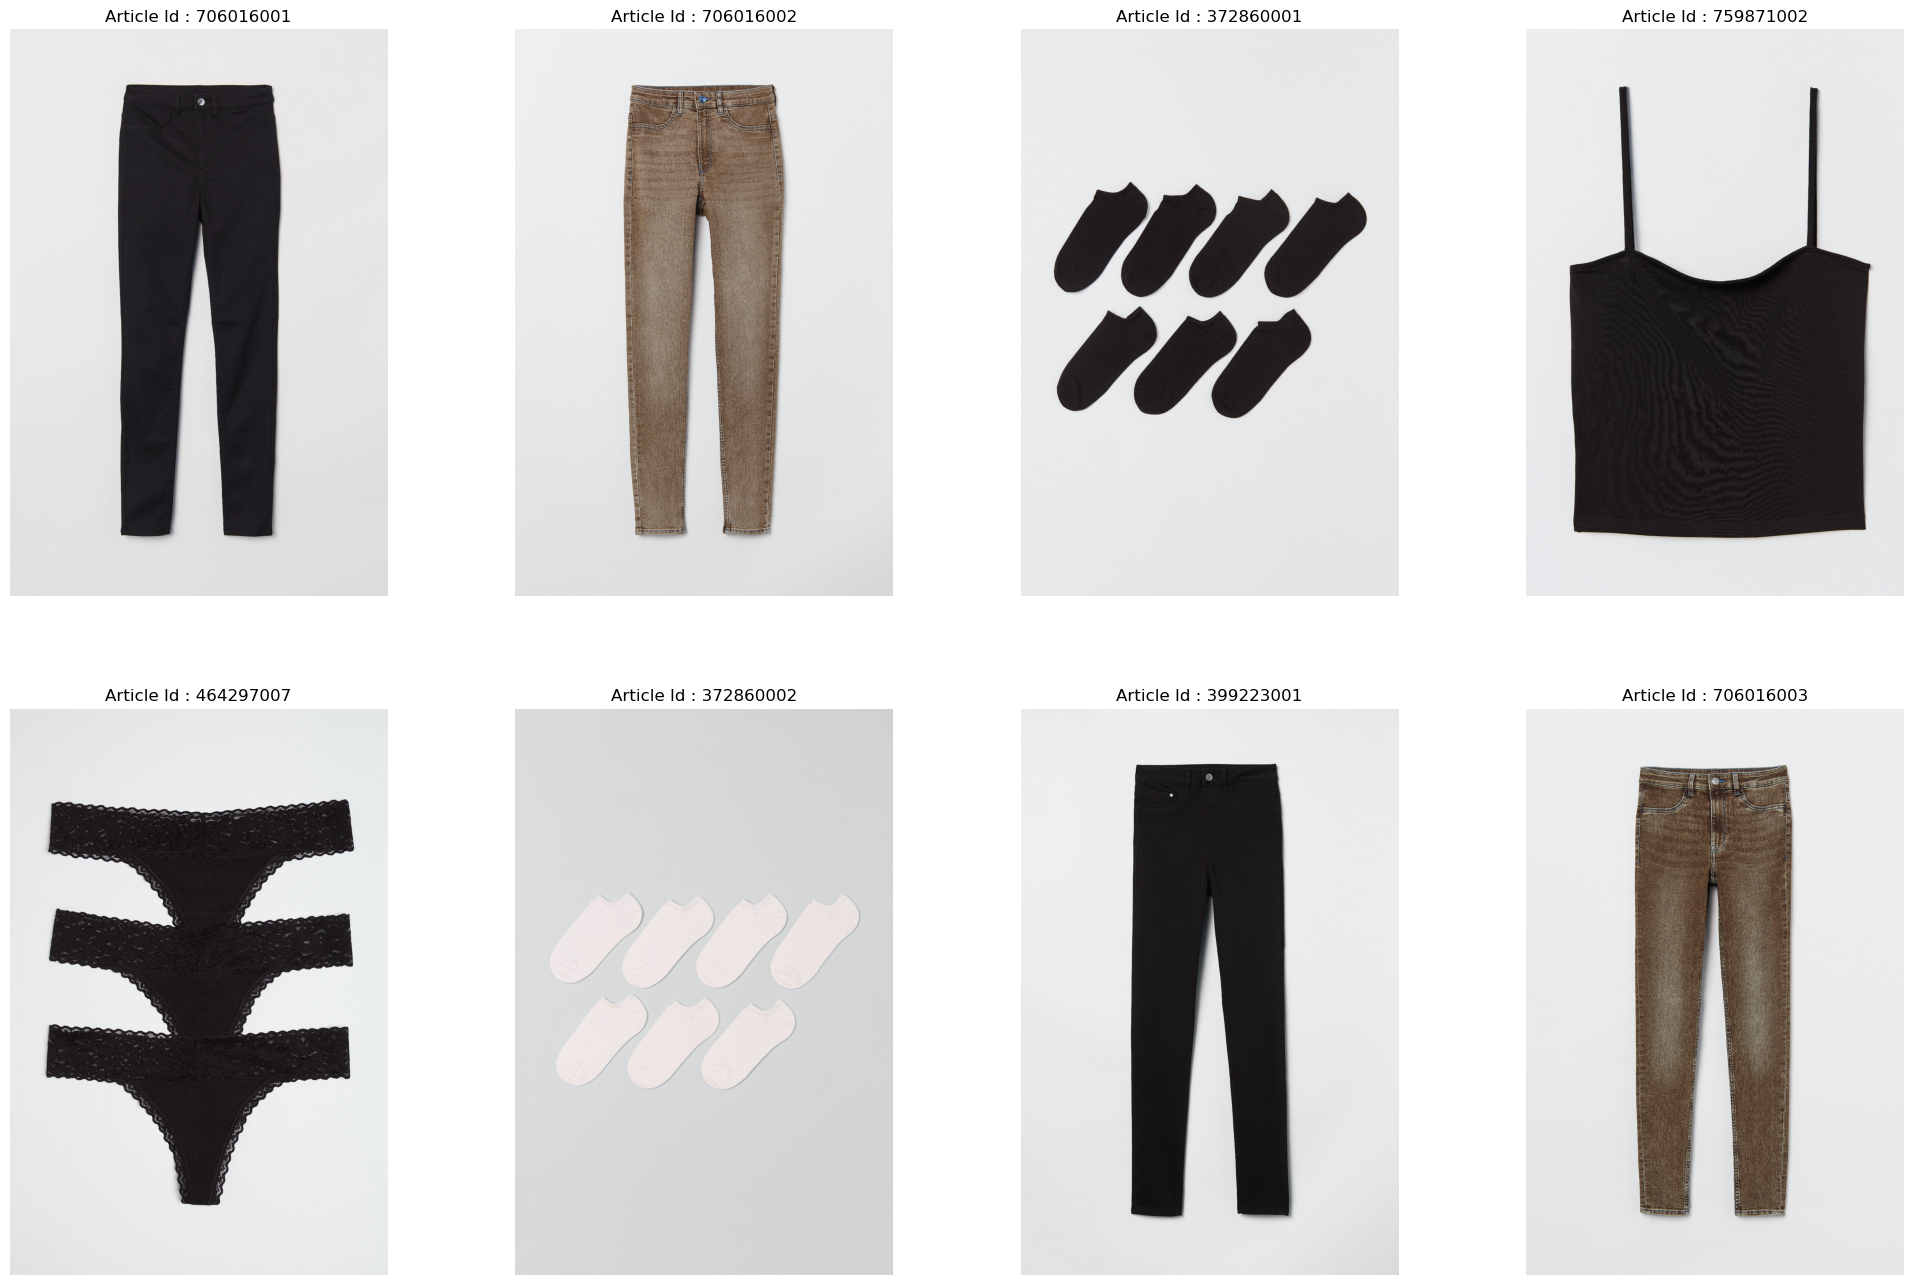

In [44]:
fig = plt.figure(figsize=(25,25))

a,b,c = 3,4,1
base_path = "/Users/seema/Downloads/h-and-m-personalized-fashion-recommendations/images/"

for i in popular_items.index.tolist()[0:10]:
    
    img_path = base_path +  '0' + str(i)[0:2] + '/0' + str(i) + '.jpg'
    
    if(('0' + str(i) + '.jpg') in os.listdir(base_path +  '0' + str(i)[0:2])):
        img = cv2.imread(img_path)
    
    #print(img_path)
        
        plt.subplot(a, b, c)
        plt.title('Article Id : {}'.format(i))
        c+=1
        plt.imshow(img)
        plt.axis("off")
        
    else:
        
        print("Image for id ",i," is not available")
    
        
    
        
    
plt.show()

In [45]:
cust_nodes = popular_customers.index.tolist()

c_nodes = {}
c = 0
for i in cust_nodes:
    c_nodes[c] = i
    c+=1

p_nodes = {}
c = 0
prod_nodes = transactions['article_id'].value_counts()[0:25].index.to_list()

for i in prod_nodes:
    p_nodes[c] = i
    c+=1

In [63]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 MB 12.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


Image for id  610776002  is not available
Image for id  610776001  is not available


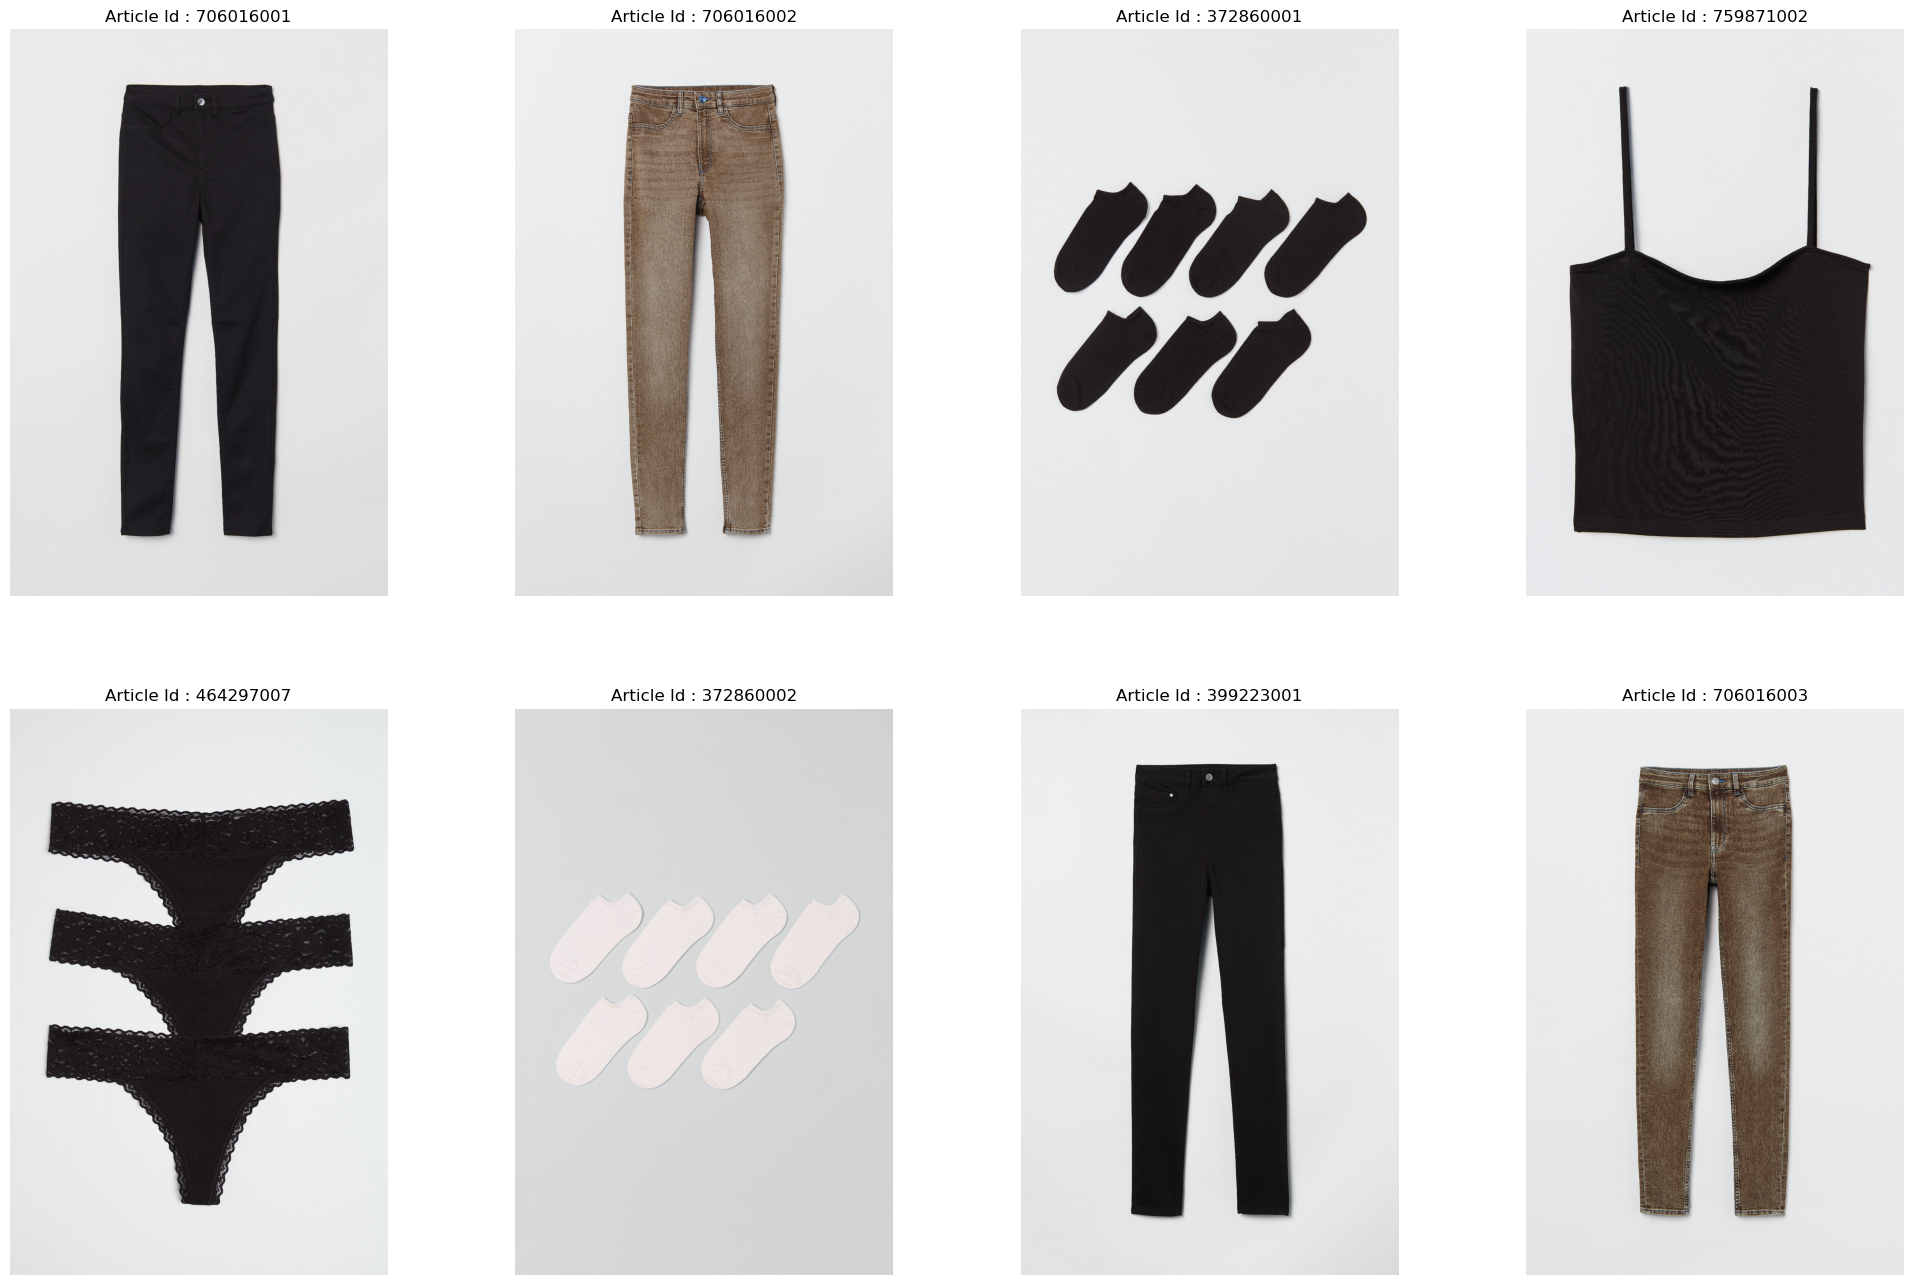

In [46]:
fig = plt.figure(figsize=(25,25))

a,b,c = 3,4,1
base_path = "/Users/seema/Downloads/h-and-m-personalized-fashion-recommendations/images/"

for i in popular_items.index.tolist()[0:10]:
    
    img_path = base_path +  '0' + str(i)[0:2] + '/0' + str(i) + '.jpg'
    
    if(('0' + str(i) + '.jpg') in os.listdir(base_path +  '0' + str(i)[0:2])):
        img = cv2.imread(img_path)
    
    #print(img_path)
        
        plt.subplot(a, b, c)
        plt.title('Article Id : {}'.format(i))
        c+=1
        plt.imshow(img)
        plt.axis("off")
        
    else:
        
        print("Image for id ",i," is not available")
    
        
    
        
    
plt.show()